In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report , confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler , LabelEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn import svm, datasets


In [ ]:
df = pd.read_csv("/content/mushrooms-full-dataset.csv", dtype=str)
df.head(10)

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


In [ ]:
target = df['poisonous']
input = df.iloc[:,1:]

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(input,target,test_size=0.2,stratify=target,random_state=365)

In [ ]:
y_test.value_counts()

e    842
p    783
Name: poisonous, dtype: int64

In [ ]:
Oenc = OrdinalEncoder()
Lenc = LabelEncoder()

In [ ]:
x_train_trf = Oenc.fit_transform(x_train)
x_test_trf = Oenc.fit_transform(x_test)

y_train_trf = Lenc.fit_transform(y_train)
y_test_trf = Lenc.fit_transform(y_test)

In [ ]:
x_test_trf.shape
y_test_trf.shape

(1625,)

In [ ]:
scaling = MinMaxScaler(feature_range= (-1,1))
x_train_rescaled = scaling.fit_transform(x_train_trf)
x_test_rescaled = scaling.fit_transform(x_test_trf)



In [ ]:
from sklearn.svm import SVC
# svm = svm.fit()

In [ ]:
svc_clf = SVC(kernel='linear', C=1)
svc_clf = svc_clf.fit(x_train_rescaled,y_train_trf)


In [ ]:
y_pred_test = svc_clf.predict(x_test_rescaled)

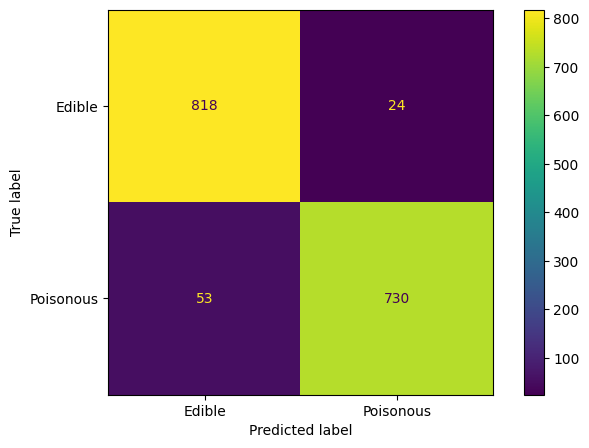

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
cmp = ConfusionMatrixDisplay(
    confusion_matrix(y_test_trf,y_pred_test),
    display_labels=["Edible","Poisonous"]
)
cmp.plot(ax=ax)

In [ ]:
print(classification_report(y_test_trf,y_pred_test,target_names=["Edible","Poisonous"]))

              precision    recall  f1-score   support

      Edible       0.94      0.97      0.96       842
   Poisonous       0.97      0.93      0.95       783

    accuracy                           0.95      1625
   macro avg       0.95      0.95      0.95      1625
weighted avg       0.95      0.95      0.95      1625



In [ ]:
tuned_parameters = [
    {"kernel" : ["linear"] , "C" : [1,10]},
    {"kernel" : ["poly"] , "C" : [1,10]},
    {"kernel" : ["rbf"], "gamma" : [1e-3,1e-4], "C" : [1,10]}
]


In [ ]:
svc = SVC()

In [ ]:
scores = ["precision", "recall"]
scores

['precision', 'recall']

In [ ]:
for s in scores:
  print("# Tuning hyper-parameter for %s " % s)
  clf = GridSearchCV(svc, tuned_parameters, scoring= "%s_macro" % s , cv=5)
  clf.fit(x_test_rescaled,y_test_trf)


# Tuning hyper-parameter for precision 


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning

# Tuning hyper-parameter for recall 


In [ ]:
print("Best parameter set found on training set : " , clf.best_params_)
print()    #printing an empty line
print(" Grid scores on training set : ", clf.cv_results_)

Best parameter set found on training set :  {'C': 10, 'kernel': 'poly'}

 Grid scores on training set :  {'mean_fit_time': array([0.03709989, 0.12972841, 0.01559191, 0.01605015, 0.05634394,
       0.08047819, 0.02883277, 0.05400429]), 'std_fit_time': array([0.00562856, 0.03022348, 0.00049495, 0.00232123, 0.00498911,
       0.00203462, 0.00105762, 0.00330694]), 'mean_score_time': array([0.00403376, 0.00354896, 0.00355563, 0.00290866, 0.02115889,
       0.03016014, 0.01023493, 0.02015352]), 'std_score_time': array([0.0008717 , 0.00046982, 0.00011172, 0.00014684, 0.00306829,
       0.00083983, 0.0010766 , 0.00172426]), 'param_C': masked_array(data=[1, 10, 1, 10, 1, 1, 10, 10],
             mask=[False, False, False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_kernel': masked_array(data=['linear', 'linear', 'poly', 'poly', 'rbf', 'rbf',
                   'rbf', 'rbf'],
             mask=[False, False, False, False, False, False, False, Fals

In [ ]:
means = clf.cv_results_["mean_test_score"]
stds = clf.cv_results_["std_test_score"]  # getting the means and std test score from above and assigning it to a variable
param = clf.cv_results_["params"]
for m, s, p in zip(means,stds,param ):
  print("%0.3f (+/-%0.03f) for %r " % (m, s*2, p))

print()

print("Detailed Classification report :  ")
print()
print("The model is trained on the full training set ")
print("The model is computed on full testing set ")

print()
y_pred = clf.predict(scaling.transform(x_test_trf))
print(classification_report(y_test_trf, y_pred))


0.958 (+/-0.024) for {'C': 1, 'kernel': 'linear'} 
0.964 (+/-0.022) for {'C': 10, 'kernel': 'linear'} 
0.999 (+/-0.002) for {'C': 1, 'kernel': 'poly'} 
1.000 (+/-0.000) for {'C': 10, 'kernel': 'poly'} 
0.921 (+/-0.028) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'} 
0.500 (+/-0.000) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'} 
0.938 (+/-0.025) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'} 
0.920 (+/-0.028) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'} 

Detailed Classification report :  

The model is trained on the full training set 
The model is computed on full testing set 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       842
           1       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

